In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne
from sklearn.cluster import KMeans

In [4]:
# Load the dataset
raw = mne.io.read_raw_brainvision(
   "sub-00002_ses-1_task-sleep_run-20160531_2257.vhdr",
    preload=True
)

Extracting parameters from sub-00002_ses-1_task-sleep_run-20160531_2257.vhdr...
Setting channel info structure...


C:\Users\hp\AppData\Local\Temp\ipykernel_141340\2150219817.py:2: RuntimeWarning: No coordinate information found for channels ['ECG', 'EMG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(


Reading 0 ... 396019  =      0.000 ...  1584.076 secs...


C:\Users\hp\AppData\Local\Temp\ipykernel_141340\2150219817.py:2: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['ECG', 'EMG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


In [5]:
# Set channels
raw.set_channel_types({
    "ECG": "ecg",
    "EMG": "emg"
})

C:\Users\hp\AppData\Local\Temp\ipykernel_141340\203033170.py:2: RuntimeWarning: The unit for channel(s) ECG, EMG has changed from NA to V.
  raw.set_channel_types({


<RawBrainVision | sub-00002_ses-1_task-sleep_run-20160531_2257.dat, 65 x 396020 (1584.1 s), ~196.5 MiB, data loaded>

In [9]:
# Pick only EEG channels (ignore EMG, ECG, etc.)
raw.pick_types(eeg=True)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


<RawBrainVision | sub-00002_ses-1_task-sleep_run-20160531_2257.dat, 63 x 396020 (1584.1 s), ~190.4 MiB, data loaded>

In [10]:
#Apply a basic average reference
raw.set_eeg_reference('average', projection=False)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawBrainVision | sub-00002_ses-1_task-sleep_run-20160531_2257.dat, 63 x 396020 (1584.1 s), ~190.4 MiB, data loaded>

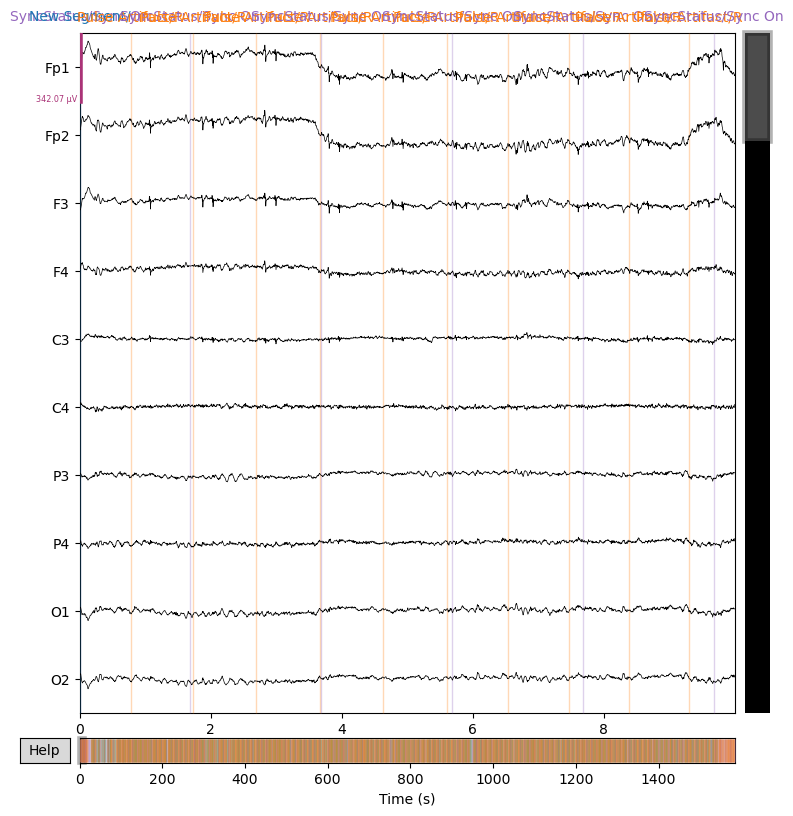

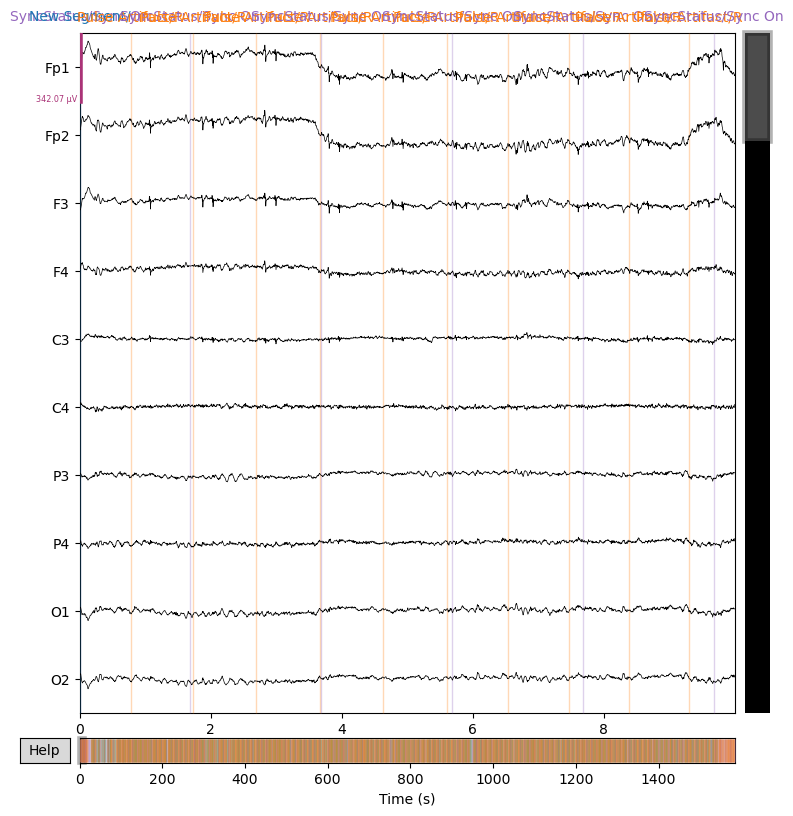

In [11]:
raw.plot(n_channels=10, duration=10, scalings='auto')

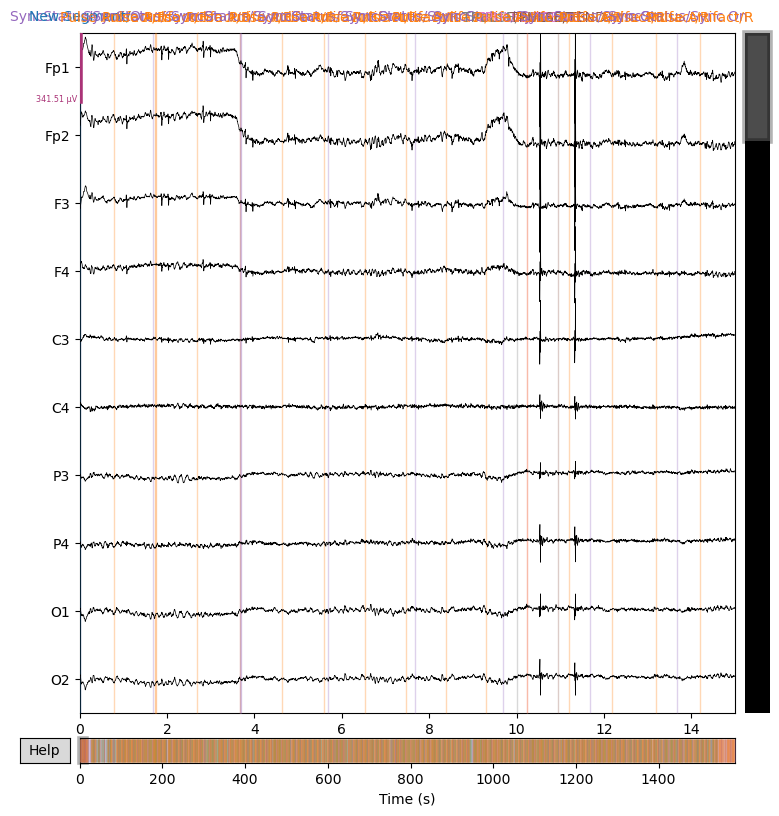

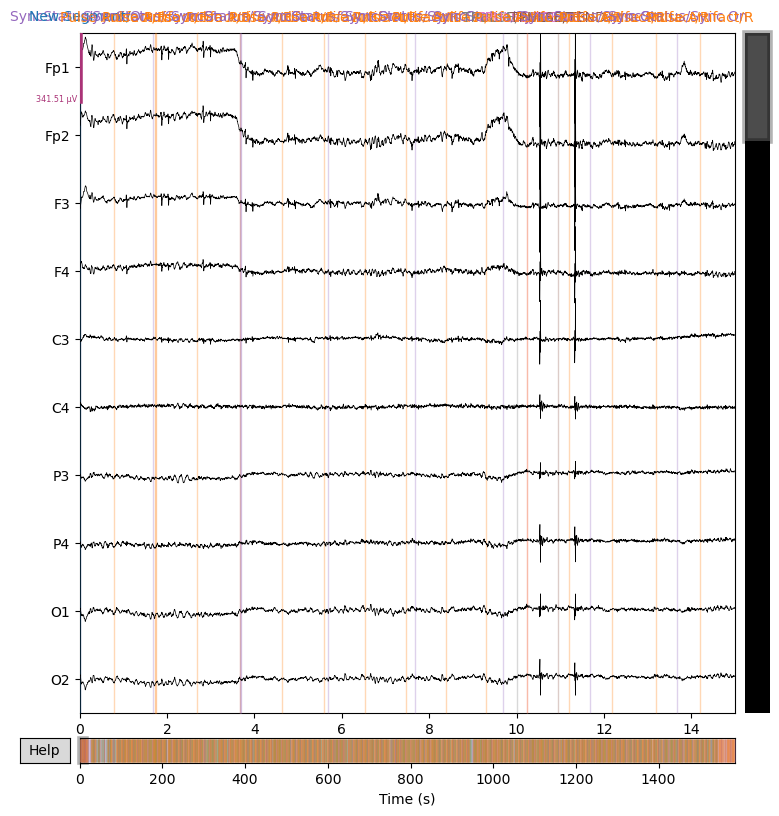

In [15]:
raw.plot(n_channels=10, duration=15, scalings='auto')

In [7]:
psds = raw.copy().compute_psd(fmin=8, fmax=12).get_data()
alpha_power = psds.mean(axis=1)  # average over channels
print("Alpha power per channel:", alpha_power)

Effective window size : 8.192 (s)
Alpha power per channel: [6.27586058e-12 6.75310388e-12 1.66603596e-12 1.81491195e-12
 2.02627928e-12 2.73828313e-12 5.88070077e-12 6.17496851e-12
 9.63950888e-12 9.74138610e-12 7.19654141e-12 4.03907327e-12
 1.27785555e-11 4.05856084e-12 1.62523150e-11 6.44554451e-12
 1.30284096e-12 6.52788508e-13 5.62993432e-12 9.18365185e-12
 4.74441839e-14 9.42833834e-13 5.40375017e-12 3.29408097e-12
 2.63778890e-12 2.72633053e-12 8.11469158e-12 6.85608901e-12
 2.14396556e-11 7.44505774e-12 9.18225663e-12 7.44295127e-13
 1.75968089e-12 6.42981488e-13 1.33548121e-12 5.12604843e-12
 3.21567992e-12 1.85559446e-12 6.20024760e-12 9.52427716e-13
 1.90277145e-12 3.44503922e-12 4.28551761e-12 9.23536329e-12
 9.35195184e-12 1.47004644e-12 2.88265359e-12 5.31106760e-12
 4.03483499e-12 8.08940426e-12 7.14729477e-12 3.95551240e-12
 4.17811397e-12 3.76065282e-12 3.41058923e-12 1.57850196e-11
 5.77018542e-12 1.01367632e-11 9.89796233e-12 7.01952899e-12
 3.71782761e-12 7.02779670

Not setting metadata
1583 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1583 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


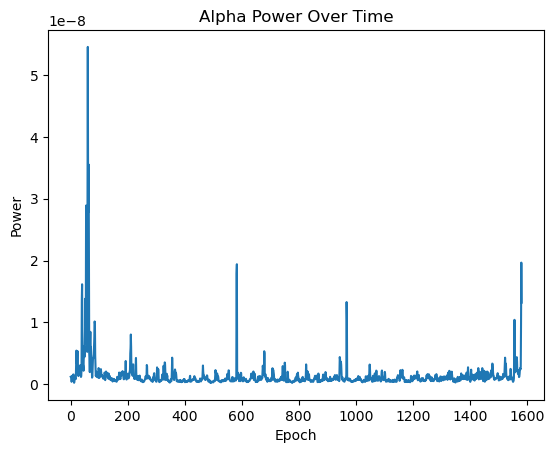

In [8]:
epochs = mne.make_fixed_length_epochs(raw, duration=2.0, overlap=1.0, preload=True)
alpha_power_epochs = epochs.compute_psd(fmin=8, fmax=12).get_data().mean(axis=(1,2))

import matplotlib.pyplot as plt
plt.plot(alpha_power_epochs)
plt.title("Alpha Power Over Time")
plt.xlabel("Epoch")
plt.ylabel("Power")
plt.show()